In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/lukewood/rl-routing && cd rl-routing && pip install .

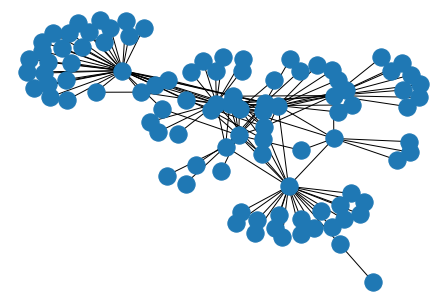

In [5]:
import networkx as nx
G=nx.random_internet_as_graph(100)
pos = nx.spring_layout(G)
nx.set_node_attributes(G, pos, "pos")
nx.draw(G)

In [4]:
class ShortestPathAgent():
    def actions(self, observation):
        actions = -1*np.ones((len(G.nodes), len(G.nodes)), dtype=np.int32)
        adj_matrix, wires, packets, routes = observation
        # shortest path routes are returned as part of observation
        # as a baseline we construct an action based on this
        for f in routes.keys():
            for t in routes[f].keys():
                actions[f][t] = routes[f][t]
        return actions

In [24]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import time
from collections import defaultdict
from IPython.display import clear_output
import numpy as np

from rl_routing import NetworkEnv
from array2gif import write_gif

def draw_output(img):
    plt.axis("off")
    plt.imshow(img)
    plt.show()

env = NetworkEnv(graph=G, fig=Figure(figsize=(6, 6)))
i = 100

agent = ShortestPathAgent()
observation = env.reset(initial_packets=100)
frames = []

while True:

    actions = agent.actions(observation)
    # actions is a list of steps to be taken for each node
    # the packet with the highest value (earliest created) is sent based on step's input
    observation, reward, done, info = env.step(actions)
    
    img = env.render()
    img = img[..., :-1].transpose((2, 0, 1))
    frames.append(img)
    # Give a more efficient the agent to achieve more score
    if env.done():
        break

In [55]:
import os
from moviepy.editor import ImageSequenceClip

def gif(filename, array, fps=1, scale=1.0):
    """Creates a gif given a stack of images using moviepy
    Notes
    -----
    works with current Github version of moviepy (not the pip version)
    https://github.com/Zulko/moviepy/commit/d4c9c37bc88261d8ed8b5d9b7c317d13b2cdf62e
    Usage
    -----
    >>> X = randn(100, 64, 64)
    >>> gif('test.gif', X)
    Parameters
    ----------
    filename : string
        The filename of the gif to write to
    array : array_like
        A numpy array that contains a sequence of images
    fps : int
        frames per second (default: 10)
    scale : float
        how much to rescale each image by (default: 1.0)
    """

    # ensure that the file has the .gif extension
    fname, _ = os.path.splitext(filename)
    filename = fname + '.gif'

    # make the moviepy clip
    clip = ImageSequenceClip(list(array), fps=fps).resize(scale)
    clip.write_gif(filename, fps=fps)
    return clip
gif("test", [frame.transpose((1, 2, 0)) for frame in frames])

t:  27%|██▋       | 6/22 [00:00<00:00, 55.55it/s, now=None]

MoviePy - Building file test.gif with imageio.
